In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
raw_data = pd.read_csv('/content/Glassdoor Gender Pay Gap.csv')
raw_data

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [ ]:
raw_data1 = pd.read_csv('/content/Salary Data.csv')
raw_data1

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=bb8ed3f4b6918057914c5c771cfc6be61773c544b81c765e7c3ecbfb808619d0
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
import re

In [ ]:
from autocorrect import Speller
AutoCorrector= Speller()

def autocorrect_text(input_text):
    corrected_text = []
    input_text = input_text.split(" ")
    for text in input_text:
        if (len(text)>3):
            corrected_text.append(AutoCorrector(text))
        else:
            corrected_text.append(text)
    corrected_text = " ".join(corrected_text)
    return corrected_text

In [ ]:
raw_data1 = raw_data1.dropna(axis=0)
raw_data1 = raw_data1.dropna(axis=1)

In [ ]:
raw_data["JobTitle"] = raw_data["JobTitle"].apply(autocorrect_text)
raw_data1["Job Title"] = raw_data1["Job Title"].apply(autocorrect_text)

raw_data["JobTitle"] = raw_data["JobTitle"].apply(str.lower)
raw_data1["Job Title"] = raw_data1["Job Title"].apply(str.lower)

data = pd.DataFrame()
data["Job Title"] = raw_data["JobTitle"].to_list() + raw_data1["Job Title"].to_list()
data["Salary"] = raw_data["BasePay"].to_list() + raw_data1["Salary"].to_list()

In [ ]:
for idx in data.index:
    new_title = []
    job_title = data["Job Title"][idx].split(" ")
    for word in (job_title):
        if (word=="man"):
            word = "manager"
        if (word=="rep"):
            word = "representative"
        new_title.append(word)
    new_title = " ".join(new_title)

    data.at[idx,"Job Title"] = new_title
data

,Job Title,Salary
0,graphic designer,42363.0
1,software engineer,108476.0
2,warehouse associate,90208.0
3,software engineer,108080.0
4,graphic designer,99464.0
...,...,...
1368,senior marketing analyst,85000.0
1369,director of operations,170000.0
1370,junior project manager,40000.0
1371,senior operations coordinator,90000.0


In [ ]:
job_titles = sorted(data["Job Title"].unique())

job_titles = sorted(list(set(job_titles)))

print("Num of job titles:",len(job_titles))
print(job_titles)

Num of job titles: 178
['account manager', 'accountant', 'administrative assistant', 'business analyst', 'business development manager', 'business intelligence analyst', 'ceo', 'chief data officer', 'chief technology officer', 'content marketing manager', 'copywriter', 'creative director', 'customer service manager', 'customer service representative', 'customer success manager', 'customer success representative', 'data analyst', 'data entry clerk', 'data scientist', 'digital content producer', 'digital marketing manager', 'director', 'director of business development', 'director of engineering', 'director of finance', 'director of hr', 'director of human capital', 'director of human resources', 'director of marketing', 'director of operations', 'director of product management', 'director of sales', 'director of sales and marketing', 'driver', 'event coordinator', 'financial advisor', 'financial analyst', 'financial manager', 'graphic designer', 'help desk analyst', 'hr generals', 'hr m

In [ ]:
job_titles_bow = [job_title.split() for job_title in job_titles]
job_titles_bow = [word for word_list in job_titles_bow for word in word_list]

job_titles_bow = [job_title.lower() for job_title in job_titles_bow]

job_titles_bow = sorted(list(set(job_titles_bow)))

print("Bag of words size:",len(job_titles_bow))
print(job_titles_bow)

Bag of words size: 86
['account', 'accountant', 'administrative', 'advertising', 'advisor', 'analyst', 'and', 'architect', 'assistant', 'associate', 'assurance', 'business', 'capital', 'ceo', 'chain', 'chief', 'clerk', 'consultant', 'content', 'coordinator', 'copywriter', 'creative', 'customer', 'data', 'designer', 'desk', 'developer', 'development', 'digital', 'director', 'driver', 'engineer', 'engineering', 'entry', 'event', 'executive', 'finance', 'financial', 'generals', 'graphic', 'help', 'hr', 'human', 'intelligence', 'it', 'junior', 'management', 'manager', 'marketing', 'media', 'network', 'of', 'office', 'officer', 'operations', 'principal', 'producer', 'product', 'project', 'public', 'quality', 'recruiter', 'relations', 'representative', 'research', 'researcher', 'resources', 'sales', 'scientist', 'senior', 'service', 'social', 'software', 'specialist', 'strategy', 'success', 'supply', 'support', 'technical', 'technology', 'training', 'ux', 'vp', 'warehouse', 'web', 'writer']


In [ ]:
JOB_TITLE_MAX_LEN = 5

In [ ]:
import json
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# job_titles_sentences = [job_title.split(" ") for job_title in job_titles]
job_titles_sentences = [job_title for job_title in job_titles]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(job_titles_sentences)

tokenizer_config = tokenizer.get_config()
tokenizer_config_json = json.dumps(tokenizer_config, indent=2)

with open("tokenizer_config.json", "w") as outfile:
    json.dump(tokenizer_config, outfile)

sequences = tokenizer.texts_to_sequences(data["Job Title"])
# print(sequences)

TokenizeX = pad_sequences(sequences, maxlen=JOB_TITLE_MAX_LEN)
Tokenizey = data["Salary"].to_list()
print(len(TokenizeX))
print(len(Tokenizey))

1373
1373


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))
matrix = vectorizer.fit_transform(data["Job Title"])
CountVectorizerDF = pd.DataFrame(data= matrix.toarray(), columns = vectorizer.get_feature_names_out())
display(CountVectorizerDF)

VectorizerX = CountVectorizerDF
Vectorizery = data["Salary"].to_list()
# print(vectorizer.get_feature_names_out())
print(vectorizer.vocabulary_)

,account,account executive,account manager,accountant,administrative,administrative assistant,advertising,advertising coordinator,advisor,analyst,...,ux designer,ux researcher,vp,vp of,warehouse,warehouse associate,web,web designer,web developer,writer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


{'graphic': 75, 'designer': 49, 'graphic designer': 76, 'software': 219, 'engineer': 62, 'software engineer': 222, 'warehouse': 248, 'associate': 14, 'warehouse associate': 249, 'it': 89, 'sales': 180, 'sales associate': 182, 'driver': 61, 'financial': 70, 'analyst': 9, 'financial analyst': 72, 'marketing': 119, 'marketing associate': 121, 'data': 43, 'scientist': 188, 'data scientist': 48, 'manager': 118, 'data analyst': 44, 'senior': 189, 'senior manager': 201, 'director': 59, 'marketing analyst': 120, 'product': 153, 'product manager': 157, 'sales manager': 185, 'coordinator': 35, 'marketing coordinator': 122, 'senior scientist': 210, 'developer': 52, 'software developer': 221, 'hr': 79, 'hr manager': 82, 'project': 159, 'project manager': 162, 'customer': 39, 'service': 214, 'representative': 170, 'customer service': 40, 'service representative': 216, 'operations': 144, 'operations manager': 148, 'marketing manager': 124, 'senior engineer': 195, 'entry': 64, 'clerk': 30, 'data entr

In [ ]:
from gensim.models import Word2Vec

# train model
# job_titles_sentences = [re.findall(r'\S+|\s', job_title) for job_title in job_titles]
job_titles_sentences = [job_title.split(" ") for job_title in job_titles]

word2vec_model = Word2Vec(job_titles_sentences, min_count=1, epochs=1000, seed=1, negative=0, hs=1, window=1)

print(word2vec_model)

print("bag of word in word2vec model:",len(word2vec_model.wv.index_to_key))

print("'{}' word vector: {}".format(job_titles_bow[0],word2vec_model.wv[job_titles_bow[0]]))

word2vec_model.save('word2vec_model.bin')

word2vec_model = Word2Vec.load('word2vec_model.bin')
print(word2vec_model)



Word2Vec<vocab=86, vector_size=100, alpha=0.025>
bag of word in word2vec model: 86
'account' word vector: [ 4.04866710e-02  2.62710869e-01  3.74851301e-02  1.64706185e-01
 -3.65160376e-01  3.38119358e-01  2.80556023e-01 -3.41628164e-01
  2.44051576e-01  3.25220032e-03  2.57539034e-01 -3.18661071e-02
  3.26494694e-01 -5.19371152e-01  8.76483768e-02  1.34315833e-01
 -3.60705674e-01 -2.63111204e-01  1.97540671e-01  2.38819078e-01
  2.92432010e-01 -1.40894935e-01 -1.19137019e-01  1.67018712e-01
 -3.69688451e-01 -3.86340283e-02  1.42744988e-01 -5.74642241e-01
  3.68842572e-01 -3.66825134e-01 -2.00026199e-01 -1.00092508e-01
  6.05106056e-01  3.88950408e-01  1.68940499e-01  2.06313387e-01
  7.24014714e-02  3.76040608e-01 -7.61009976e-02  9.34645608e-02
  4.73255329e-02  4.77111042e-01  2.52546698e-01  4.39908914e-02
  1.03078149e-01  2.27896526e-01  6.84764147e-01  3.88699561e-01
  5.36586493e-02 -1.81705147e-01  8.42763036e-02  5.41430175e-01
  8.81944448e-02  3.84924620e-01 -2.31328994e-01 

In [ ]:
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
import numpy as np

import matplotlib.pyplot as plt
import random


def reduce_dimensions(model):
    num_dimensions = 2

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)


    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(word2vec_model)


<Figure size 1500x1500 with 0 Axes>

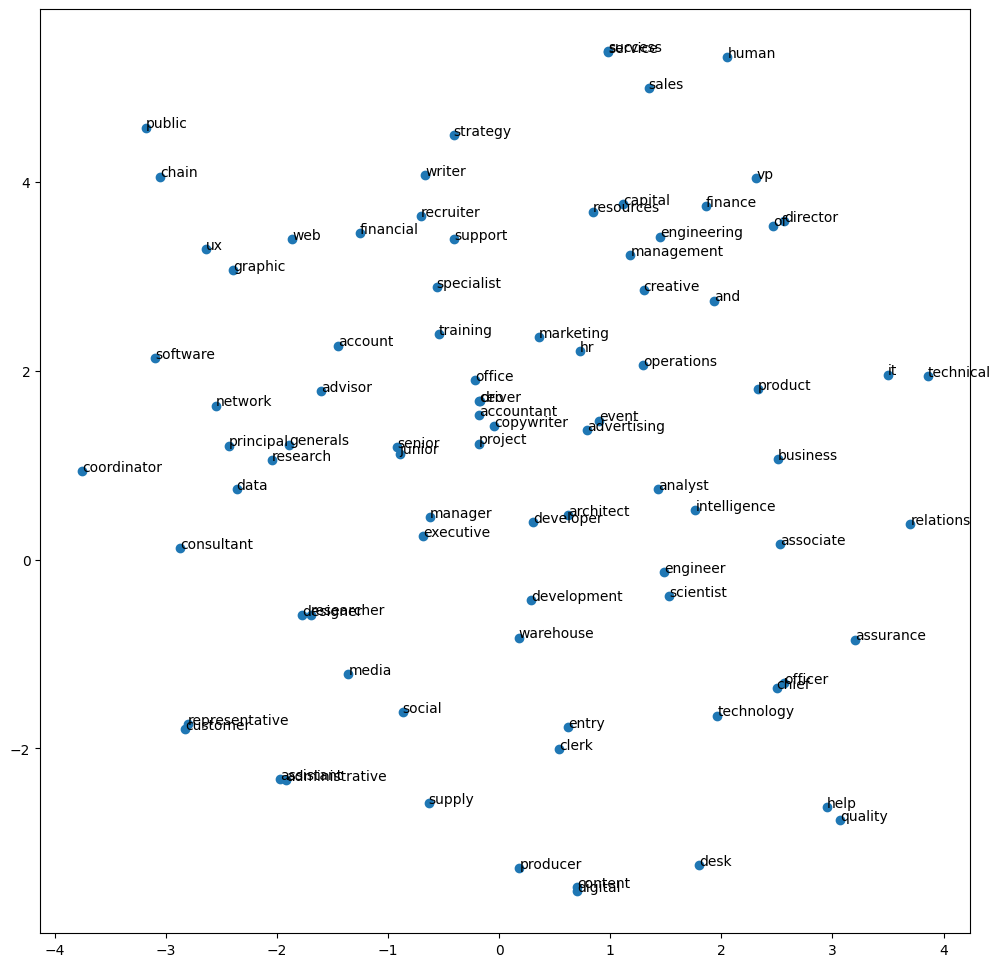

In [ ]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)
    indices = list(range(len(labels)))
    for i in indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))
plot_size = 15
plt.figure(figsize=(plot_size,plot_size))
plot_function = plot_with_matplotlib
plot_function(x_vals, y_vals, labels)

In [ ]:
word = "engineer".lower()
sims = word2vec_model.wv.most_similar(word, topn=10)
print(sims)

[('architect', 0.6152432560920715), ('scientist', 0.578834593296051), ('officer', 0.46894001960754395), ('chief', 0.4620990753173828), ('associate', 0.45943233370780945), ('graphic', 0.4251408278942108), ('relations', 0.39440518617630005), ('product', 0.372130423784256), ('assurance', 0.36600083112716675), ('ux', 0.35980483889579773)]


In [ ]:
Word2VecX = data["Job Title"].to_list()
Word2Vecy = data["Salary"].to_list()

def JobTitleWord2Vec(job_title):
    job_title = job_title.split(" ")

    #change to word vector
    word_vector = []
    for word_idx,word in enumerate(job_title):
        word_vector += list(word2vec_model.wv[word])

    #add padding
    word_vector = [0]*((JOB_TITLE_MAX_LEN*100)-len(word_vector)) + word_vector
    return word_vector

for idx,job_title in enumerate(Word2VecX):
    Word2VecX[idx] = JobTitleWord2Vec(job_title)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
num_of_features = len(job_titles_bow)
print("num of features:",num_of_features)

train_X, val_X, train_y, val_y = train_test_split(TokenizeX, Tokenizey, random_state=1)

# regression_model = LinearRegression()
# regression_model = DecisionTreeRegressor(random_state=0,criterion="squared_error")
regression_model = RandomForestRegressor(random_state=0,criterion="absolute_error")
# regression_model = KNeighborsRegressor(n_neighbors=num_of_features,weights="distance")
regression_model.fit(train_X,train_y)

prediction = regression_model.predict(val_X)
error = mean_absolute_error(prediction, val_y)
test_job_title = []
test_data_size = 10

for val in (val_X[:test_data_size]):
    word = tokenizer.sequences_to_texts([val])
    word = " ".join(word)
    test_job_title.append(word)

test_df = pd.DataFrame()
test_df["job title"] = test_job_title
test_df["salary"] = val_y[:test_data_size]
test_df["predicted salary"] = prediction[:test_data_size]
display(test_df)

print("Error: {:,.0f}".format(error))

num of features: 86


,job title,salary,predicted salary
0,senior product manager,120000.0,137225.000
1,data scientist,96582.0,94653.215
2,driver,103242.0,90427.675
3,data analyst,80000.0,74641.315
4,software engineer,92928.0,105617.485
5,marketing associate,46903.0,77077.175
6,driver,64008.0,90427.675
7,marketing associate,93805.0,77077.175
8,sales associate,98321.0,93780.870
9,manager,127013.0,123124.390


Error: 18,964


In [ ]:
job = input('Enter The Job Title :- ').lower()

set(test_df.loc[test_df['job title'].str.contains(job), 'predicted salary'])

Enter The Job Title :- manager


{123124.39, 137225.0}